# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

<font color='red'>  
Цели исследования:
- Получить информацию о времени продажи квартиры.
- Найти факторы, которые большего всего влияют на стоимость квартиры.
- Изучить предложение квартир по локации.
- Выделить и получить информацию по квартирам в центре Санкт-Петербурга.

План действий:
- Т.к. часть данных записаны пользователями, они могут содержать ошибки. Ошибки также могут быть и в данных, полученных автоматически на основе картографических данных. Для начала нужен обзор данных. Далее, будем делать предобработку данных. Искать аномалии, пропущенные значения и т.д.

Для решения поставленных задач необходимо рассчитать и добавить в таблицу несколько показателей:
- Цена за 1 квадратный метр
- День недели, месяц и год публикации объявления
- Этаж квартиры (первый, последний, другой)
- Расстояние до центра города

Исследование пройдёт в 5 этапов:
- Обзор данных
- Предобработка данных
- Расчёты и добавление результатов в таблицу
- Исследовательский анализ данных
- Выводы
    </font> 

### Откройте файл с данными и изучите общую информацию

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Читаем файл
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
df.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0         51.0      8          NaN   False   
1             NaN          11.0         18.6      1          NaN   False   
2             NaN           5.0         34.3      4          NaN   False   
3             NaN          14.0          NaN      9          NaN   False   
4            3.03          14.0         32.0     13          NaN   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0      NaN  Санкт-Петербург           18863.0   
1      False          11.0      2.0   посёлок Шушары           12817.0   
2      False           8.3      0.0  Санкт-Петербург           21741.0   
3      False           NaN      0.0  Санкт-Петербург           28098.0   
4      False          41.0      NaN  Санкт-Петербург           31856.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
1              18603.0               0.0            NaN               0.0   
2              13933.0               1.0           90.0               2.0   
3               6800.0               2.0           84.0               3.0   
4               8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0

In [3]:
# Смотрим информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# Ищем количество явных дубликатов в DataFrame
df.duplicated().sum()

0

In [5]:
# Смотрим количество пропусков
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# check
# пропущенные значения бары

def pass_value_barh(dfg):
    try:
        (
            (dfg.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

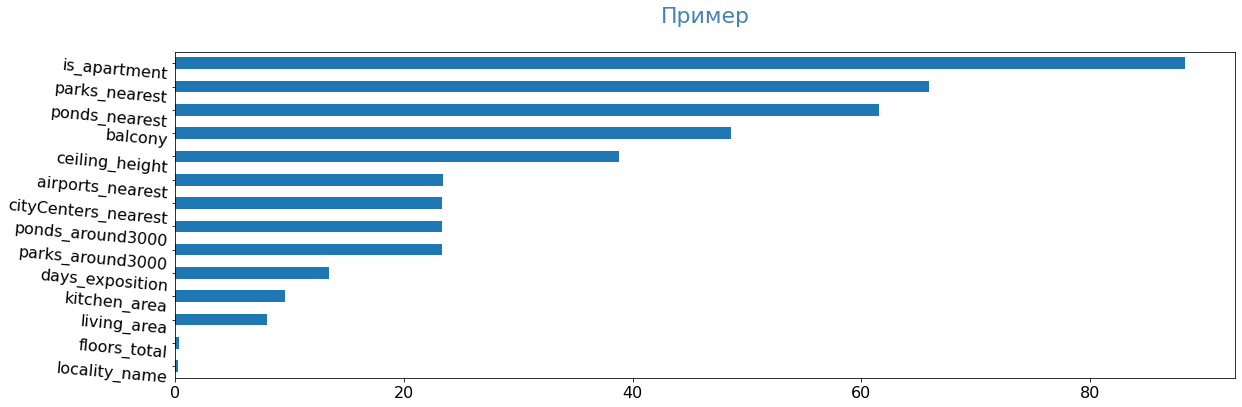

In [7]:
pass_value_barh(df)

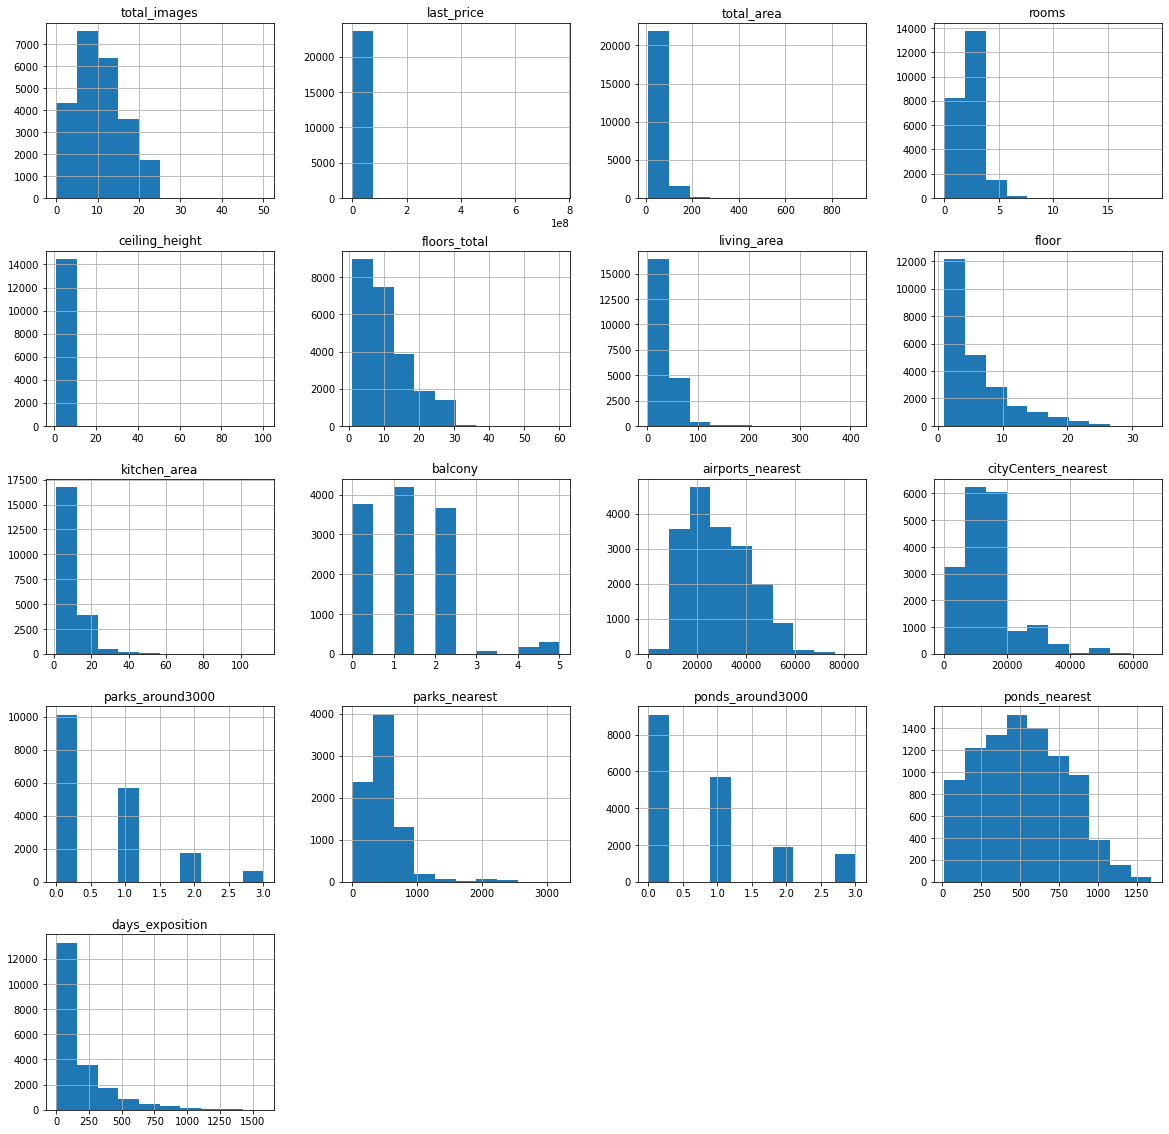

In [8]:
# Строим гистораммы 
df.hist(figsize=(20, 20))
plt.show()

#### Промежуточный вывод: 
- Файл прочитан, в данных 23699 записи. Явные дубликаты отсутствуют. 
- Часть столбцов имеют пропущенные значения и некорректный тип данных: В столбцах floors_total, balcony, parks_around3000, ponds_around3000 и days_exposition тип данных должнен быть целочисленным, is_apartment - тип bool, first_day_exposition - тип datetime.
- Гистограммы показывают, что в данных есть аномальные значения. 

### Выполните предобработку данных

#### Приводим имена столбцов к единому стилю

In [9]:
# Переименовываем
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'})
df.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0         51.0      8          NaN   False   
1             NaN          11.0         18.6      1          NaN   False   
2             NaN           5.0         34.3      4          NaN   False   
3             NaN          14.0          NaN      9          NaN   False   
4            3.03          14.0         32.0     13          NaN   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0      NaN  Санкт-Петербург           18863.0   
1      False          11.0      2.0   посёлок Шушары           12817.0   
2      False           8.3      0.0  Санкт-Петербург           21741.0   
3      False           NaN      0.0  Санкт-Петербург           28098.0   
4      False          41.0      NaN  Санкт-Петербург           31856.0   

   city_centers_nearest  parks_around_3000  parks_nearest  ponds_around_3000  \
0               16028.0                1.0          482.0                2.0   
1               18603.0                0.0            NaN                0.0   
2               13933.0                1.0           90.0                2.0   
3                6800.0                2.0           84.0                3.0   
4                8098.0                2.0          112.0                1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0

#### Обработка пропусков и замена типов данных

In [10]:
# Выведем еще раз количество пропусков
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [11]:
df['last_price'].astype('int')
df['total_area'].round(2)

0        108.00
1         40.40
2         56.00
3        159.00
4        100.00
          ...  
23694    133.81
23695     59.00
23696     56.70
23697     76.75
23698     32.30
Name: total_area, Length: 23699, dtype: float64

In [12]:
df['first_day_exposition'].unique()

array(['2019-03-07T00:00:00', '2018-12-04T00:00:00',
       '2015-08-20T00:00:00', ..., '2014-12-29T00:00:00',
       '2016-09-12T00:00:00', '2015-07-19T00:00:00'], dtype=object)

In [13]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_exposition'].unique()

array(['2019-03-07T00:00:00.000000000', '2018-12-04T00:00:00.000000000',
       '2015-08-20T00:00:00.000000000', ...,
       '2014-12-29T00:00:00.000000000', '2016-09-12T00:00:00.000000000',
       '2015-07-19T00:00:00.000000000'], dtype='datetime64[ns]')

In [14]:
# пропуски в высоте потолков заменяем медианой
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median()) 

Минимальная высота потолков 1 метр, максимальная - 100 метров. Исправим эту ошибку.

In [15]:
df.loc[df['ceiling_height'] >= 5, 'ceiling_height'].count()

37

In [16]:
# Значения больше 20 поделим на 10
df.loc[df['ceiling_height'] >= 20, 'ceiling_height'] = df['ceiling_height'] / 10

In [17]:
df['ceiling_height'].sort_values(ascending=False).head(10)

15061    14.0
22309    10.3
22869    10.0
5863      8.3
17442     8.0
15743     8.0
3474      8.0
20264     6.0
21227     5.8
1388      5.6
Name: ceiling_height, dtype: float64

In [18]:
# Пропуски в количестве этажей заменяем медианой
#df['floors_total'] = df['floors_total'].fillna(df.groupby('floor')['floors_total'].transform('median')).astype(int)
#df['floors_total'].unique()

In [19]:
#(df['floors_total'] < df['floor']).value_counts()

In [20]:
# Заменим на False
df['is_apartment'] = df['is_apartment'].fillna(False)
# Заменяем тип данных на bool
df['is_apartment'] = df['is_apartment'].astype(bool)

In [21]:
# Заменим на 0
df['kitchen_area'] = df['kitchen_area'].fillna(0)
df['kitchen_area'].round(2)

0        25.00
1        11.00
2         8.30
3         0.00
4        41.00
         ...  
23694    13.83
23695     8.50
23696     0.00
23697    23.30
23698     9.00
Name: kitchen_area, Length: 23699, dtype: float64

In [22]:
# Заменим на 0
df['balcony'] = df['balcony'].fillna(0)
df['balcony'] = df['balcony'].astype(int)

In [23]:
# Переводим названия населённых пунктов в строчные буквы
df['locality_name'] = df['locality_name'].str.lower()

# Удалим уточняющее местоположение
df['locality_name'] = (df['locality_name'].str.replace('ё','е')
    .replace(['городского типа ', 'городской поселок ', 'деревня ', 'пансионат ', 'платформа ',
              'поселок ', 'при железнодорожной станции ','садовое товарищество ',
              'садоводческое некоммерческое товарищество ', 'село ', 'станции ', 'коттеджный '], '', regex=True)
)
# Выводим уникальные значения
set(df['locality_name'].unique())

{'69-й километр',
 nan,
 'агалатово',
 'александровская',
 'алексеевка',
 'аннино',
 'аро',
 'барышево',
 'батово',
 'бегуницы',
 'белогорка',
 'белоостров',
 'бокситогорск',
 'большая вруда',
 'большая ижора',
 'большая пустомержа',
 'большие колпаны',
 'большое рейзино',
 'большой сабск',
 'бор',
 'борисова грива',
 'бугры',
 'будогощь',
 'ваганово',
 'важины',
 'вартемяги',
 'вахнова кара',
 'вещево',
 'виллози',
 'вознесенье',
 'возрождение',
 'войсковицы',
 'войскорово',
 'володарское',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'вырица',
 'выскатка',
 'высокоключевой',
 'высоцк',
 'гаврилово',
 'гарболово',
 'гатчина',
 'гладкое',
 'глажево',
 'глебычево',
 'глинка',
 'гончарово',
 'горбунки',
 'гостилицы',
 'громово',
 'дзержинского',
 'дружная горка',
 'дружноселье',
 'дубровка',
 'елизаветино',
 'ефимовский',
 'жилгородок',
 'жилпоселок',
 'житково',
 'заводской',
 'заклинье',
 'заневка',
 'запорожское',
 'зеленогорск',
 'зеленый бор',
 'зимитицы',
 'ивангород',
 'изва

In [24]:
# Проупски здесь заменяем на unknown
df['locality_name'] = df['locality_name'].fillna('unknown')

#### check name

In [25]:
# check
df.locality_name.nunique()

306

In [26]:
# Не будем менять
df['airports_nearest'].round(2)

0        18863.0
1        12817.0
2        21741.0
3        28098.0
4        31856.0
          ...   
23694    24665.0
23695        NaN
23696        NaN
23697    39140.0
23698        NaN
Name: airports_nearest, Length: 23699, dtype: float64

In [27]:
df['city_centers_nearest'].round(2)

0        16028.0
1        18603.0
2        13933.0
3         6800.0
4         8098.0
          ...   
23694     4232.0
23695        NaN
23696        NaN
23697    10364.0
23698        NaN
Name: city_centers_nearest, Length: 23699, dtype: float64

In [28]:
# Заменим на 0
df['parks_around_3000'] = df['parks_around_3000'].fillna(0)
df['parks_around_3000'] = df['parks_around_3000'].astype(int)

In [29]:
df['parks_nearest'].round(2)

0        482.0
1          NaN
2         90.0
3         84.0
4        112.0
         ...  
23694    796.0
23695      NaN
23696      NaN
23697    173.0
23698      NaN
Name: parks_nearest, Length: 23699, dtype: float64

In [30]:
# Заменим на 0
df['ponds_around_3000'] = df['ponds_around_3000'].fillna(0)
df['ponds_around_3000'] = df['ponds_around_3000'].astype(int)

In [31]:
df['ponds_nearest'].round(2)

0        755.0
1          NaN
2        574.0
3        234.0
4         48.0
         ...  
23694    381.0
23695      NaN
23696      NaN
23697    196.0
23698      NaN
Name: ponds_nearest, Length: 23699, dtype: float64

In [32]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000           0
parks_nearest           15620
ponds_around_3000           0
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Описание данных и где мы убрали пропуски:
- total_images - число фотографий квартиры в объявлении 
- last_price - цена на момент снятия с публикации 
- total_area - общая площадь квартиры в квадратных метрах (м²) 
- first_day_exposition - дата публикации
- rooms — число комнат
- ceiling_height - высота потолков - заменили NaN на медианное значение
- floors_total - всего этажей в доме - пропуски заменили на медианное значение
- living_area - жилая площадь в квадратных метрах (м²) - пропуски оставили без зменений
- is_apartment - аппартаменты - при заполнении их скорее всего не указали, заменили пропуски на False 
- studio — квартира-студия
- open_plan — свободная планировка
- kitchen_area - площадь кухни - возможно их не указали в объявлении, заменили на 0
- balcony - балконы - возможно их наличие не указали в объявлении, заменили на 0
- locality_name - населенный пункт - оставили только названия, пропуски заменили на unknown
- airports_nearest - расстояние до ближайшего аэропорта
- city_centers_nearest - расстояние до центра города
- parks_nearest - расстояние до ближайшего парка 
- parks_around_3000 - число парков в радиусе 3 км - заменили на 0, скорее всего отсутствие данного значения говорит о том, что парков рядом нет
- ponds_nearest - расстояние до ближайшего водоёма
- ponds_around_3000 - число водоёмов в радиусе 3 км - аналогично parks_around_3000
- days_exposition - сколько дней было размещено объявление (от публикации до снятия) - пропуски скорее всего, указывают, что объект не продан, пока без изменений

In [33]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000           0
parks_nearest           15620
ponds_around_3000           0
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Промежуточный вывод: 
- Выполнена предобработка данных.
- Переименованы столбцы.
- Где было возможно, пропуски ликвидированы.
- Изменили тип данных в last_price, floors_total, balcony, parks_around_3000, ponds_around_3000 на целочисленные, т.к. они содержат только целые числа, is_apartment на bool, т.к. содержит булевы значения, first_day_exposition на datetime, т.к. содержит время.
- Округлили значение до значащих величин.
- Заполнили явные пропуски в таблице.
- Причинами пропусков могли стать: человеческий фактор, необязательность заполнения всех данных в программе, програмные ошибки.

### Добавьте в таблицу новые столбцы

#### В таблицу добавлены:
- price_square_meter - цена одного квадратного метра
- day_publication - день публикации объявления (0 - понедельник, 1 - вторник и т. д.)
- month_publication - месяц публикации объявления
- year_publication - год публикации объявления
- type_apartment_floor - тип этажа квартиры (значения — «первый», «последний», «другой»)
- distance_city_center - расстояние до центра города в километрах

In [34]:
df['price_square_meter'] = (df['last_price'] / df['total_area']).round(2)
df['price_square_meter'].unique()

array([120370.37,  82920.79,  92785.71, ...,  44091.71, 149511.4 ,
        41795.67])

In [35]:
df['day_publication'] = df['first_day_exposition'].dt.weekday 
df['day_publication'].unique()

array([3, 1, 4, 0, 2, 6, 5])

In [36]:
df['month_publication'] = df['first_day_exposition'].dt.month 
df['month_publication'].unique()

array([ 3, 12,  8,  7,  6,  9, 11,  4,  5,  2,  1, 10])

In [37]:
df['year_publication'] = df['first_day_exposition'].dt.year 
df['year_publication'].unique()

array([2019, 2018, 2015, 2017, 2016, 2014])

In [38]:
# df['type_apartment_floor'] = 'другой'
# df.loc[df['floor'] == 1, 'type_apartment_floor'] = 'первый'
# df.loc[df['floor'] == df['floors_total'], 'type_apartment_floor'] = 'последний'
# df['type_apartment_floor'].unique()

In [39]:
# Определим функцию
def floor(type):
    if type['floor'] == 1:
        return 'первый'
    if type['floor'] == type['floors_total']:
        return 'последний'
    else:
        return 'другой'

df['type_apartment_floor'] = df.apply(floor, axis=1) 
df['type_apartment_floor'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

In [40]:
df['distance_city_center'] = (df['city_centers_nearest'] / 1000).round(0)
df['distance_city_center'].unique()

array([16., 19., 14.,  7.,  8., nan, 12., 15., 52., 33., 31., 11., 13.,
       10.,  2., 32.,  4., 17., 30.,  5., 51., 50., 24., 18.,  9., 28.,
        3.,  6., 27., 21., 49., 35., 36., 34.,  1., 29., 26., 53., 22.,
       55., 20., 23., 25.,  0., 66., 47., 40., 57., 37., 41., 43., 48.,
       62., 60., 39., 42., 65., 54., 59., 45., 61., 63.])

### Проведите исследовательский анализ данных

#### Анализ общей площади

In [41]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

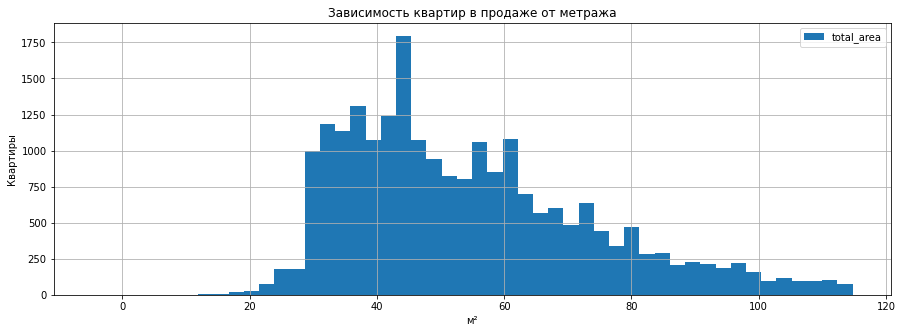

In [42]:
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = df['total_area'].quantile(.25) # первый квартиль Q1
q3 = df['total_area'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму площади
df['total_area'].hist(bins=50, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(15,5), legend=True)
plt.title('Зависимость квартир в продаже от метража')
plt.xlabel('м²')
plt.ylabel('Квартиры')
plt.show()

#### Промежуточный вывод:
- Рассматриваемый диапазон до примерно 115 м², исключая выбросы. 
- Большая часть квартир имеют площадь примерно от 30 до 70 м². 
- Самые популярные варианты - примерно 45 м². 
- Площади квартир более 100 м² и меньше 30 м² редкость.

#### Анализ жилой площади

In [43]:
df['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

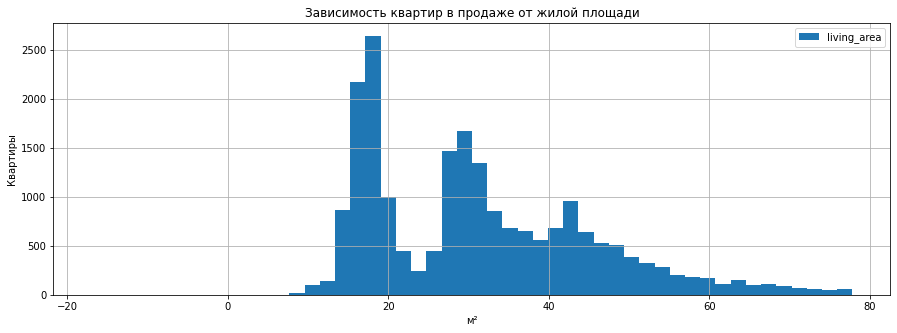

In [44]:
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = df['living_area'].quantile(.25) # первый квартиль Q1
q3 = df['living_area'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму площади
df['living_area'].hist(bins=50, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(15, 5), legend=True)
plt.title('Зависимость квартир в продаже от жилой площади')
plt.xlabel('м²')
plt.ylabel('Квартиры')
plt.show()

#### Промежуточный вывод:
- Рассматриваемый диапазон примерно до 78 м², исключая выбросы. 
- Большая часть квартир имеют жилую площадь от 15 до 30 м². 
- Самый распространенный вариант - примерно 15 м². 
- Жилая площадь объектов более 60 м² и меньше 15 м² редкость.

#### Анализ площади кухни

In [45]:
df['kitchen_area'].describe()

count    23699.000000
mean         9.553814
std          6.420973
min          0.000000
25%          6.300000
50%          9.000000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

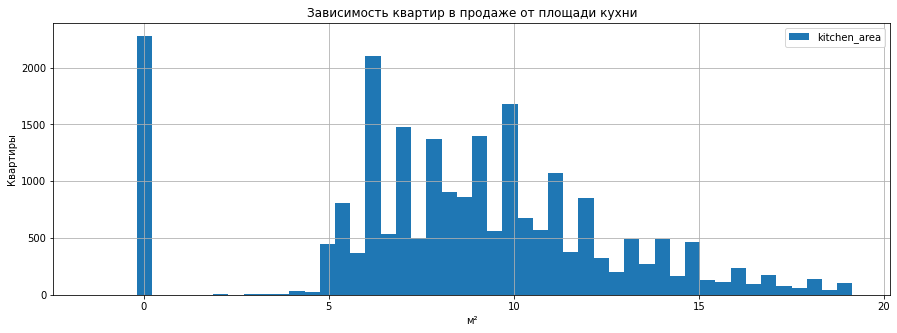

In [46]:
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = df['kitchen_area'].quantile(.25) # первый квартиль Q1
q3 = df['kitchen_area'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму площади
df['kitchen_area'].hist(bins=50, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(15, 5), legend=True)
plt.title('Зависимость квартир в продаже от площади кухни')
plt.xlabel('м²')
plt.ylabel('Квартиры')
plt.show()

#### Промежуточный вывод:
- Рассматриваемый диапазон примерно до 18 м², исключая выбросы. 
- Большая часть квартир имеют площадь кухни от 5 до 12 м². 
- Самый распространенный вариант - примерно 6 м². 
- Площадь кухни больше 13 м² и меньше 5 м² редкость. 

#### Анализ цены

In [47]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

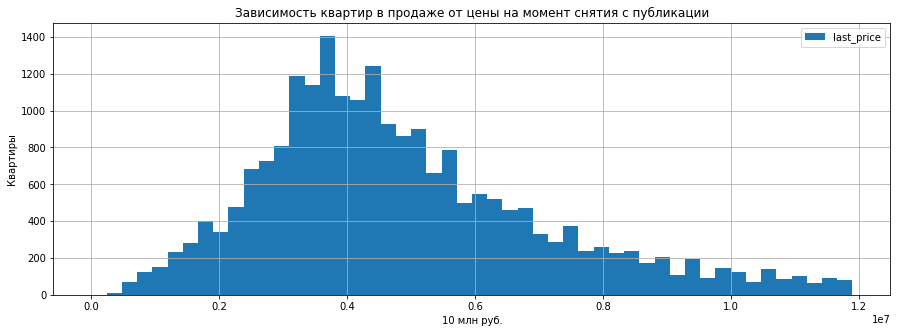

In [48]:
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = df['last_price'].quantile(.25) # первый квартиль Q1
q3 = df['last_price'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму цены
df['last_price'].hist(bins=50, range=(0, (q3 + 1.5 * iqr)), figsize=(15, 5), legend=True)
plt.title('Зависимость квартир в продаже от цены на момент снятия с публикации')
plt.xlabel('10 млн руб.')
plt.ylabel('Квартиры')
plt.show()

#### Промежуточный вывод:
- Рассматриваемый диапазон до примерно 12 млн руб., исключая выбросы. 
- Большинство квартир имеют цену от 3 до 5 млн. руб. 
- Самый распространенный вариант - примерно 3.5 млн.руб. 
- Квартиры с ценой более 10 млн редки.

#### Анализ количества комнат

In [49]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [50]:
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = df['rooms'].quantile(.25) # первый квартиль Q1
q3 = df['rooms'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму кол-ва комнат
df['rooms'].hist(bins=10, range=(1, (q3 + 1.5 * iqr)), figsize=(15, 5), legend=True)
plt.title('Зависимость квартир в продаже от количества комнат')
plt.xlabel('Комнаты')
plt.ylabel('Квартиры')
plt.show()

#### Промежуточный вывод:
- Рассматриваемый диапазон от 1 до 5 комнат, исключая ошибки (0 комнат) и выбросы.
- Большая часть квартир имеют 1 или 2 комнаты, немного меньше - 3 комнаты. 
- Квартиры, с 4-5 комнатами относительно редки. 

#### Анализ высоты потолков

In [51]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.698721
std          0.253208
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

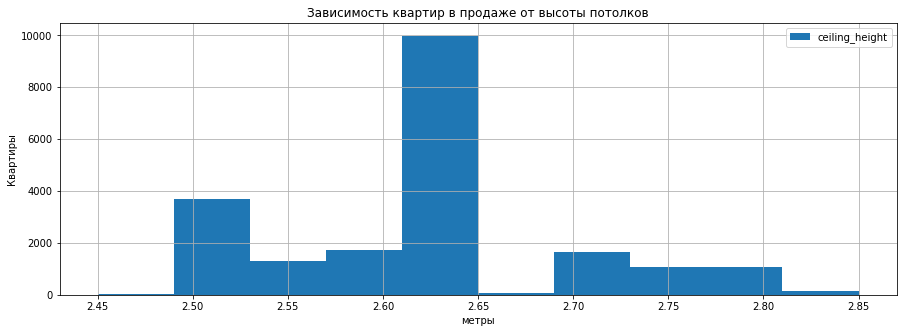

In [52]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = df['ceiling_height'].quantile(.25) # первый квартиль Q1
q3 = df['ceiling_height'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму высоты потолков
df['ceiling_height'].hist(bins=10, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(15, 5), legend=True)
plt.title('Зависимость квартир в продаже от высоты потолков')
plt.xlabel('метры')
plt.ylabel('Квартиры')
plt.show()

#### Промежуточный вывод:
- Рассматриваемый диапазон примерно от 2,5 до 2,85 м, исключая выбросы. 
- Большинство квартир имеют высоту потолков 2,5 м и 2,65 м. 

#### Анализ типа этажа квартиры

In [53]:
df['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

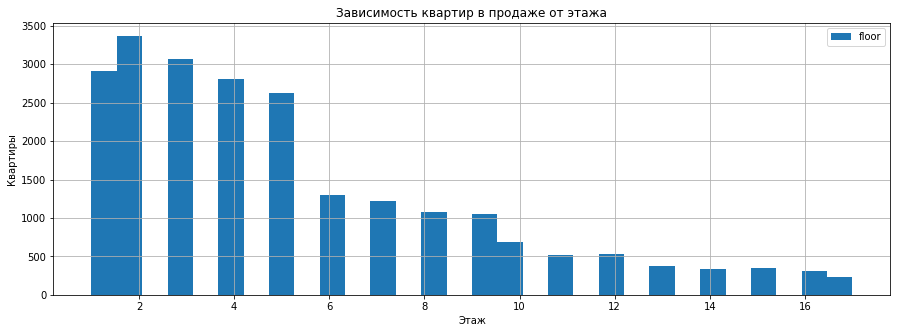

In [54]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = df['floor'].quantile(.25) # первый квартиль Q1
q3 = df['floor'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму этажа квартиры
df['floor'].hist(bins=30, range=(1, (q3 + 1.5 * iqr)), figsize=(15, 5), legend=True)
plt.title('Зависимость квартир в продаже от этажа')
plt.xlabel('Этаж')
plt.ylabel('Квартиры')
plt.show()

#### Промежуточный вывод:
- Рассматриваемый диапазон с 1 по 17 этаж, исключая выбросы. 
- Большинство квартир расположены с 1 по 4 этаж. 
- Квартиры с 4 по 7 этажи реже.

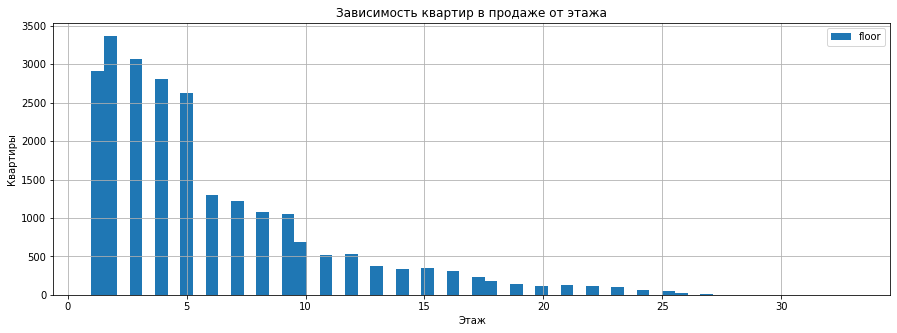

In [55]:

# Построим гистограмму этажа квартиры
df['floor'].hist(bins=60, figsize=(15, 5), legend=True)
plt.title('Зависимость квартир в продаже от этажа')
plt.xlabel('Этаж')
plt.ylabel('Квартиры')
plt.show()

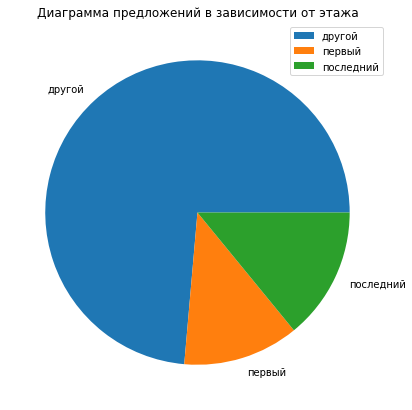

In [56]:
df.pivot_table(index='type_apartment_floor',values='last_price',aggfunc='count') \
  .plot.pie(y='last_price', figsize=(10,7), label='', title='Диаграмма предложений в зависимости от этажа')
plt.show()

#### Промежуточный вывод:
- Менее ценными считаются квартиры на первом и последнем этажах. 
- На круговой диаграмме видно, что количество таких объявлений пркатически 25%.

#### Анализ общего количества этажей в доме

In [57]:
df['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [58]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = df['floor'].quantile(.25) # первый квартиль Q1
q3 = df['floor'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму общего кол-ва этажей в доме
df['floors_total'].hist(bins=25, range=(1, (q3 + 1.5 * iqr)), figsize=(15, 5), legend=True)
plt.title('Зависимость квартир в продаже от общего количество этажей в доме')
plt.xlabel('Этаж')
plt.ylabel('Квартиры')
plt.show()

#### Промежуточный вывод:
- Рассматриваемый диапазон с 1 по 17 этажи, исключая выбросы. 
- Большинство квартир - 5-ти , 9-ти этажки. Остальные варианты представлены реже.

#### Анализ расстояния до центра города в метрах

In [59]:
df['city_centers_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [60]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = df['city_centers_nearest'].quantile(.25) # первый квартиль Q1
q3 = df['city_centers_nearest'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму расстояния до центра
df['city_centers_nearest'].hist(bins=20, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(15, 5), legend=True)
plt.title('Зависимость квартир в продаже от удаленности от центра города')
plt.xlabel('м')
plt.ylabel('Квартиры')
plt.show()

#### Промежуточный вывод:
- Рассматриваемый диапазон с 3000 до 18000 м, исключая выбросы. 
- Большинство квартир расположены на удалении 13-14 км от центра. Остальные варианты представлены реже.

#### Анализ расстояния до ближайшего парка

In [61]:
df['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [62]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = df['parks_nearest'].quantile(.25) # первый квартиль Q1
q3 = df['parks_nearest'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму расстояния до парка
df['parks_nearest'].hist(bins=15, range=(1, (q3 + 1.5 * iqr)), figsize=(15, 5), legend=True)
plt.title('Зависимость квартир в продаже от удаленности от парка')
plt.xlabel('м')
plt.ylabel('Квартиры')
plt.show()

#### Промежуточный вывод:
- Рассматриваемый диапазон от 0 до 1100 м. 
- Большинство квартир расположены от ближайшего парка на расстоянии 400-600 метров.

#### Общий вывод по разделу:
- Больше всего квартир с общей площадью от 30 до 70 кв. метров с максимумом в 52 кв. метров.
- Больше всего квартир с жилой площадью от 15 кв. метров ло 30 кв. метров, с максимумом в 30 кв. метров.
- Больше всего квартир с площадью кухни от 6 до 10 кв. метров.
- Чаще всего цена объекта составляет 3 - 5 миллниона.
- Больше всего однокомнатных и двухкомнатынх квартир. С увеличением комнат количество квартир снижается.
- Большинство квартир имеют высоту от 2,5 до 2,8 метров.
- Квартиры на первом и последнем этажах составляют почти четверть предложений, значит люди хотят съехать с них.
- Больше всего квартир в пятиэтажных домах, потом в девятиэтажных.
- Больше всего квартир на окраинах города (на расстоянии 13000 -14000 метров от центра).
- Большинство квартир <font color='red'> без данных об отдалённости от парка, из указанных - большая часть </font>   расположены в 400-600 метрах от парка.

#### Изучаем, как быстро продавались квартиры

In [63]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [64]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = df['days_exposition'].quantile(.25) # первый квартиль Q1
q3 = df['days_exposition'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму времени продажи квартиры
df['days_exposition'].hist(bins=100, range=(0, (q3 + 1.5 * iqr)), figsize=(10, 10), legend=True)
plt.title('Зависимость количества продаж от времени')
plt.xlabel('Сколько дней было размещено объявление (от публикации до снятия)')
plt.ylabel('Квартиры')
plt.show()

Видно несколько пиков, чтобы лучше проананлизировать их, изменим масштаб графика

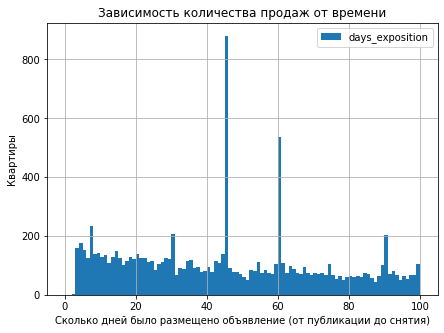

In [65]:
# Ограничим гистограмму периодом до 100 дней
df['days_exposition'].hist(bins=100, range=(0, 100), figsize=(7, 5), legend=True)
plt.title('Зависимость количества продаж от времени')
plt.xlabel('Сколько дней было размещено объявление (от публикации до снятия)')
plt.ylabel('Квартиры')
plt.show()

#### Промежуточный вывод:
- Среднее время продажи квартиры 181 день, медианное - 95 дней, оно точнее характеризует время продажи квартиры, т.к. не зависит от выбросов. Максимальное значение - 1580 дней. Больших значений достаточно много. Среднее значение в 2 раза больше медианного. Стандартное отклонение превышает среднее значение. Много выбросов.
- Чаще всего квартиры продают за 45 и 60 дней. Однако, возможно квартира была продана раньше, просто объявление было снято после, или наоборот, кватрира ещё не продана, а объявление закрылось.
- Быстрыми продажами будем считать продажи до 45 дней (1 квартиль), долгими - после 232 дня (3 квартиль).

In [66]:
# check
# Моды на сырых данных

#try:
#    df_check = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
#except:
#    df_check = pd.read_csv('real_estate_data.csv', sep='\t') 
#    
#df_check['days_exposition'].value_counts().to_frame().head(20).plot(kind = 'barh', figsize = (15,6), rot = 0);

#### Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта

Изучим зависимость цены квадратного метра от общей площади квартиры.

Изучим зависимость цены last_price от столбцов с числовыми данными при помощи вычисления корреляции:
- total_area - общая площадь
- living_area - жилая площадь
- kitchen_area - площадь кухни
- rooms - количество комнат
- type_apartment_floor - тип этажа, на котором расположена квартира
- day_publication - день публикации
- month_publication - месяц публикации
- year_publication - год публикации

In [67]:
# print('Корреляция:','\n')
# print(df.pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area',
#                                             'rooms','day_publication','month_publication','year_publication']).corr(),'\n')

In [68]:
# print('Корреляция:','\n')
# print(df.pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area','rooms']).corr(),'\n')

In [69]:
# Список с названиями параметров
corr_labels = ['last_price','total_area','living_area','kitchen_area',
                'rooms','day_publication','month_publication','year_publication']

# Получаем матрицу корреляции
corr_matrix = df[corr_labels].corr()
# Выведем на экран
display(corr_matrix)

last_price  total_area  living_area  kitchen_area  \
last_price           1.000000    0.653675     0.566492      0.386444   
total_area           0.653675    1.000000     0.939537      0.514270   
living_area          0.566492    0.939537     1.000000      0.409323   
kitchen_area         0.386444    0.514270     0.409323      1.000000   
rooms                0.363343    0.758344     0.845977      0.256087   
day_publication      0.001550   -0.004695    -0.005605     -0.022952   
month_publication    0.002779    0.004920    -0.002483      0.009253   
year_publication    -0.043089   -0.079912    -0.072696     -0.056683   

                      rooms  day_publication  month_publication  \
last_price         0.363343         0.001550           0.002779   
total_area         0.758344        -0.004695           0.004920   
living_area        0.845977        -0.005605          -0.002483   
kitchen_area       0.256087        -0.022952           0.009253   
rooms              1.000000        -0.004134          -0.004469   
day_publication   -0.004134         1.000000           0.011496   
month_publication -0.004469         0.011496           1.000000   
year_publication  -0.055418        -0.004799          -0.269642   

                   year_publication  
last_price                -0.043089  
total_area                -0.079912  
living_area               -0.072696  
kitchen_area              -0.056683  
rooms                     -0.055418  
day_publication           -0.004799  
month_publication         -0.269642  
year_publication           1.000000

Видно, что прямых зависимостей не наблюдается. Это может быть связано с выбиввающимися значениями. Обработаем их.

In [70]:
# Функция для подсчёта границ
# def quartile_range(df, column):
#     q1 = df[column].quantile(0.25)
#     q3 = df[column].quantile(0.75)
#     iqr = q3 - q1
#     dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
#     return dfq
# Столбцы с выбросами
# list_features = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height' ]
# for col in list_features:
#     df[col] = quartile_range(df, col)

#### check gap

In [71]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [72]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир

(
    df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

In [73]:
# check

try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [74]:
# check
df_check.rooms.value_counts().to_frame()

rooms
1    8047
2    7940
3    5814
4    1180
5     326
0     197
6     105
7      59
8      12
9       8
10      3
11      2
14      2
19      1
16      1
12      1
15      1

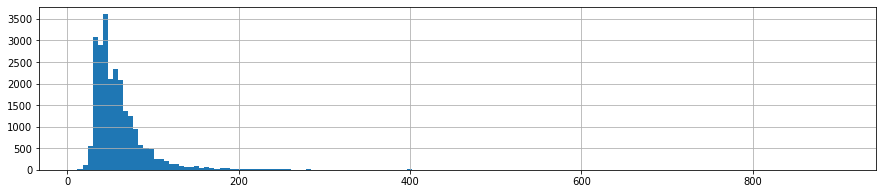

In [75]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3));

In [76]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

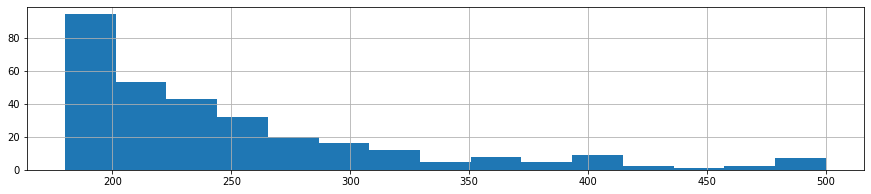

In [77]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

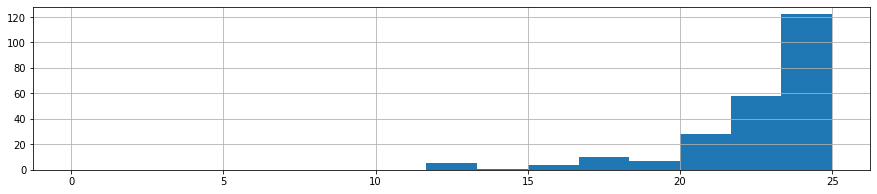

In [78]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [79]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

In [80]:
print('Анализ общей площади')
print(df.total_area.describe())
print('-' * 35)
print('Анализ жилой площади')
print(df.living_area.describe())

Анализ общей площади
count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64
-----------------------------------
Анализ жилой площади
count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


In [81]:
print('Диаграмма размаха')
df.boxplot(column=['total_area'], figsize=(5,5), grid=True)
plt.ylabel('Площадь в квадратных метрах')
plt.show()

Диаграмма размаха


In [82]:
# check
# для примера горизонтальный вид диаграммы размаха

fig, ax = plt.subplots(figsize = (17,2))
ax = df[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 400);

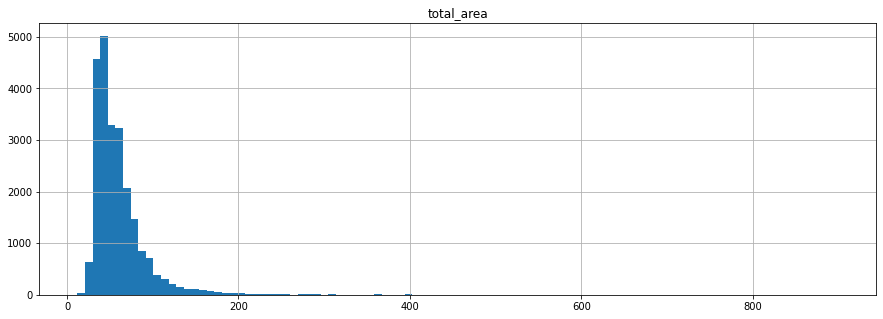

In [83]:
df.hist('total_area', bins=100, figsize=(15,5));

In [84]:
# Отсеку все значения от 15 м² до 250 м², для проведения качественного анализа
df = df.query('total_area >= 15 & total_area <= 251')

In [85]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир

(
    df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

In [86]:
print('Диаграмма размаха площади после отсечения выбивающихся значений')
df.boxplot(column=['total_area'], figsize=(5,5), grid=True)
plt.ylabel('Площадь в квадратных метрах')
plt.show()

Диаграмма размаха площади после отсечения выбивающихся значений


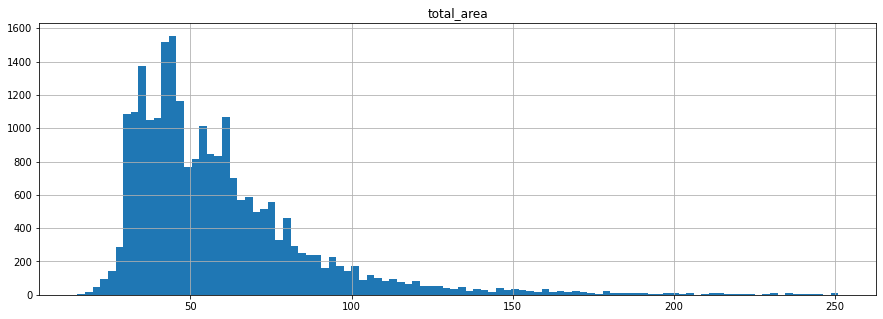

In [87]:
df.hist('total_area', bins=100, figsize=(15,5));

In [88]:
df.kitchen_area.describe()

count    23586.000000
mean         9.467172
std          6.128774
min          0.000000
25%          6.300000
50%          9.000000
75%         11.400000
max        107.000000
Name: kitchen_area, dtype: float64

Диаграмма размаха площади кухни


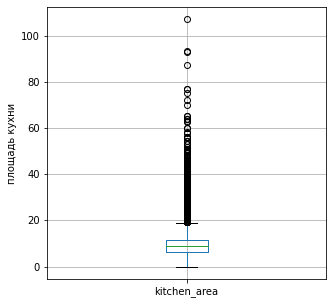

In [89]:
print('Диаграмма размаха площади кухни')
df.boxplot('kitchen_area', figsize=(5,5))
plt.ylabel('площадь кухни')
plt.show()

#### check 0

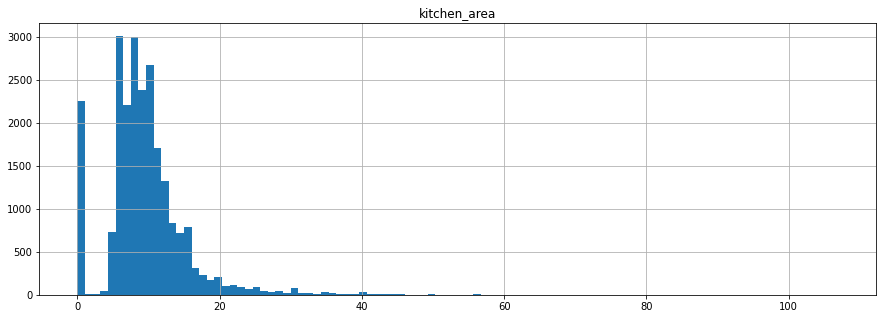

In [90]:
# check
df.hist('kitchen_area', bins= 100, figsize=(15,5));

In [91]:
# check
df.shape

(23586, 28)

In [92]:
# Отсеку все значения до 0,99 квантиля
df = df.query('kitchen_area <= 35')

In [93]:
# check
df.shape

(23404, 28)

Диаграмма размаха площади кухни


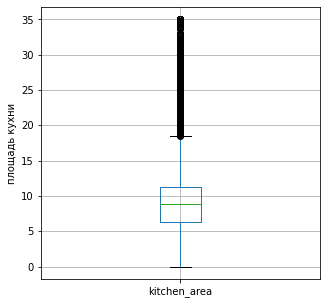

In [94]:
print('Диаграмма размаха площади кухни')
df.boxplot('kitchen_area', figsize=(5,5))
plt.ylabel('площадь кухни')
plt.show()
df.hist('kitchen_area', bins= 100, figsize=(15,5));

Диаграмма размаха цены предложений


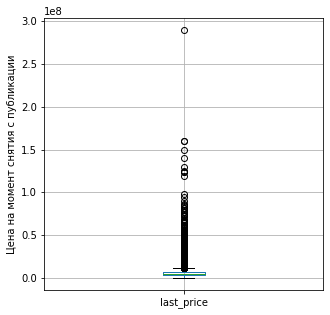

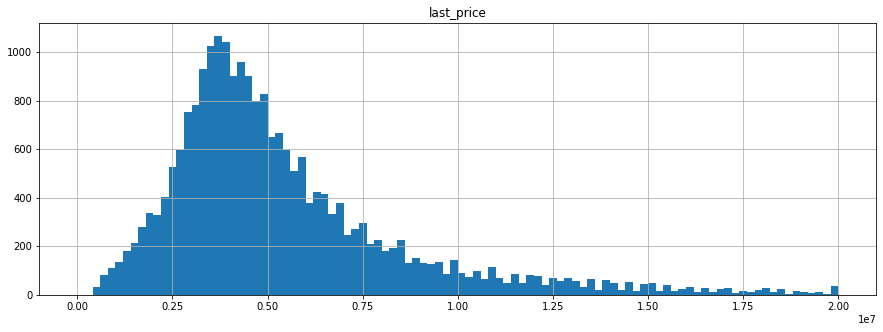

In [95]:
print('Диаграмма размаха цены предложений')
df.boxplot('last_price', figsize=(5,5))
plt.ylabel('Цена на момент снятия с публикации')
plt.show()
df.hist('last_price', bins=100, range=(0,2e+07), figsize=(15,5));

In [96]:
# check
df.shape[0]

23404

In [97]:
df = df.query('500000<last_price <= 16000000')

In [98]:
# check
df.shape[0]

22551

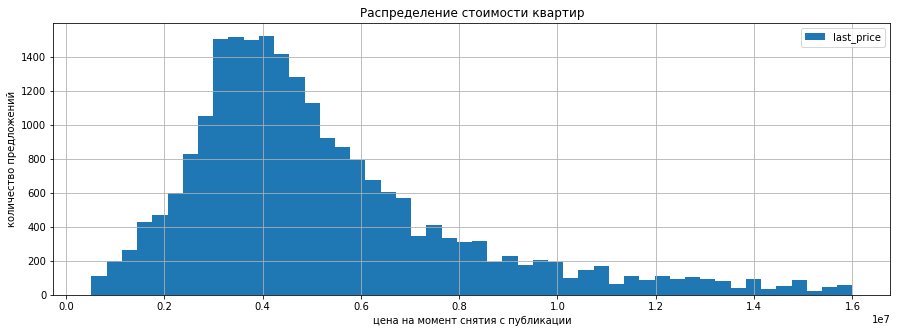

In [99]:
df.plot(kind='hist', y='last_price', title='Распределение стоимости квартир',grid=True, bins=50, figsize=(15,5))
plt.ylabel('количество предложений')
plt.xlabel('цена на момент снятия с публикации')
plt.show()

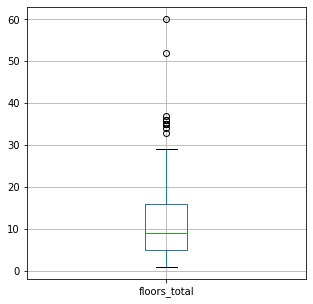

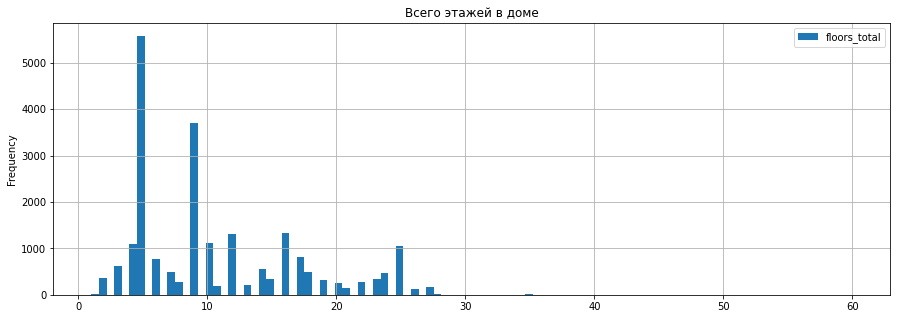

In [100]:
df.boxplot(column=['floors_total'], grid=True, figsize=(5,5))
df.plot.hist(y='floors_total',grid=True, bins=100, figsize=(15,5), title='Всего этажей в доме');

Диаграмма размаха высоты потолков


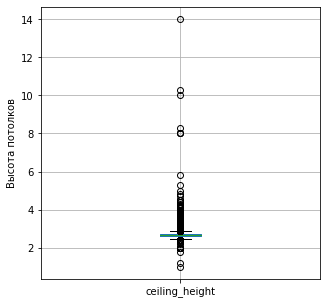

In [101]:
print('Диаграмма размаха высоты потолков')
df.boxplot(column=['ceiling_height'], figsize=(5,5), grid=True)
plt.ylabel('Высота потолков')
plt.show()

In [102]:
# check
df.shape[0]

22551

In [103]:
df = df.query('ceiling_height > 2 and ceiling_height < 3.5')

In [104]:
# check
df.shape[0]

22258

Диаграмма размаха высоты потолков


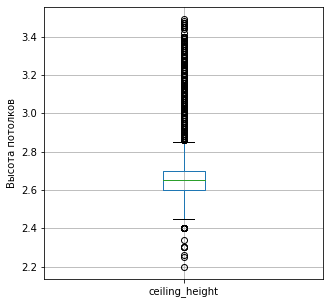

In [105]:
print('Диаграмма размаха высоты потолков')
df.boxplot(column=['ceiling_height'], figsize=(5,5), grid=True)
plt.ylabel('Высота потолков')
plt.show()

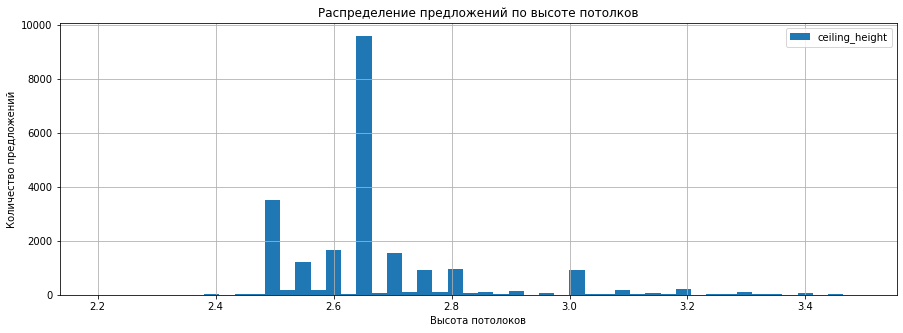

In [106]:
df.plot(kind='hist',y='ceiling_height',grid=True, bins=50, figsize=(15,5), \
        title='Распределение предложений по высоте потолков')
plt.xlabel('Высота потолоков')
plt.ylabel('Количество предложений')
plt.show()

In [107]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
   df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

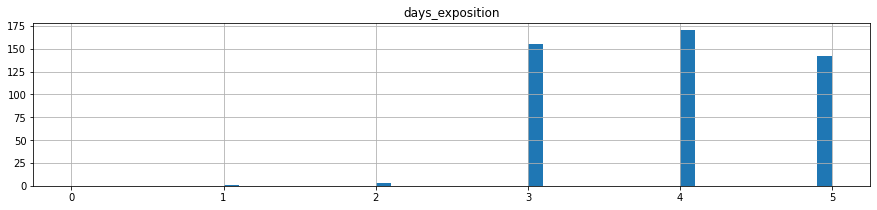

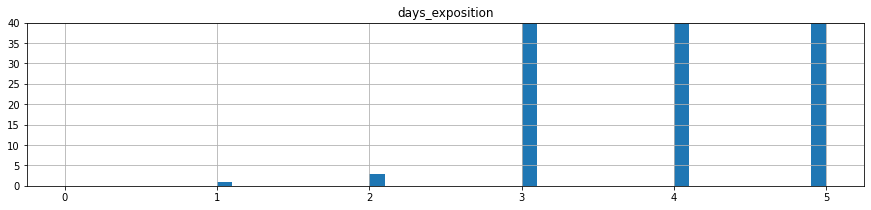

In [108]:
# check
df.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

df.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

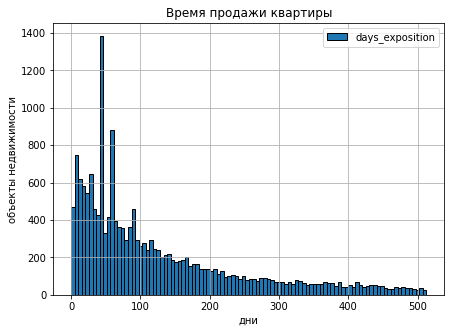

In [109]:
# Построим гистограмму времени продажи квартиры
df['days_exposition'].hist(bins=100, range=(0, (q3 + 1.5 * iqr)), figsize=(7, 5), ec='black', legend=True)
plt.title('Время продажи квартиры')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

In [110]:
# Строим диаграмму размаха времени продажи квартиры
df.boxplot(column='days_exposition', figsize=(5, 5))
plt.title('Размах времени продажи квартиры')
plt.ylim(-100, 600)
plt.ylabel('дни')
plt.show()

In [111]:
# Все, что выше этого значения - это выбросы
print(q3 + 1.5 * iqr)

512.5


#### check nan

In [112]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22258 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22258 non-null  int64         
 1   last_price            22258 non-null  float64       
 2   total_area            22258 non-null  float64       
 3   first_day_exposition  22258 non-null  datetime64[ns]
 4   rooms                 22258 non-null  int64         
 5   ceiling_height        22258 non-null  float64       
 6   floors_total          22177 non-null  float64       
 7   living_area           20513 non-null  float64       
 8   floor                 22258 non-null  int64         
 9   is_apartment          22258 non-null  bool          
 10  studio                22258 non-null  bool          
 11  open_plan             22258 non-null  bool          
 12  kitchen_area          22258 non-null  float64       
 13  balcony         

In [113]:
# Убираем выбросы по квантилю 0,998
#df = df.query('days_exposition < 1360')
df = df.loc[(df['days_exposition'] < 1360) | (df['days_exposition'].isna())]

In [114]:
# check
df.shape[0]

22233

In [115]:
# Оставим строки с этажами до 30
df = df.query('floors_total <= 30')

In [116]:
# check
df.shape[0]

22121

In [117]:
#print('Корреляция:','\n')
#print(df.pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area','rooms']).corr(),'\n')

In [118]:
# Получаем матрицу корреляции
corr_matrix = df[corr_labels].corr()
# Выведем на экран
display(corr_matrix)

last_price  total_area  living_area  kitchen_area  \
last_price           1.000000    0.746884     0.638560      0.451263   
total_area           0.746884    1.000000     0.922301      0.411882   
living_area          0.638560    0.922301     1.000000      0.244364   
kitchen_area         0.451263    0.411882     0.244364      1.000000   
rooms                0.488895    0.801068     0.885778      0.135065   
day_publication     -0.011560   -0.008577    -0.001682     -0.022582   
month_publication    0.003157    0.006189    -0.003473      0.023671   
year_publication    -0.011631   -0.068044    -0.057783     -0.049202   

                      rooms  day_publication  month_publication  \
last_price         0.488895        -0.011560           0.003157   
total_area         0.801068        -0.008577           0.006189   
living_area        0.885778        -0.001682          -0.003473   
kitchen_area       0.135065        -0.022582           0.023671   
rooms              1.000000        -0.000972          -0.003402   
day_publication   -0.000972         1.000000           0.013882   
month_publication -0.003402         0.013882           1.000000   
year_publication  -0.040614        -0.002829          -0.269788   

                   year_publication  
last_price                -0.011631  
total_area                -0.068044  
living_area               -0.057783  
kitchen_area              -0.049202  
rooms                     -0.040614  
day_publication           -0.002829  
month_publication         -0.269788  
year_publication           1.000000

Прослеживается почти прямая зависимость между:
- ценой и общей площадью
- ценой и жилой площадью

Слабая зависимость между:
- ценой и количеством комнат
- ценой и площадью кухни

В остальных прямой зависимости не наблюдается.

Выведем графики зависимостей цены от изучаемых величин.

In [119]:
#df.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(10, 10))
#plt.title('Зависимость цены от общей площади')
#plt.show()

In [120]:
df.plot(x='total_area', y ='last_price', kind ='scatter', figsize=(5, 5), legend=True, alpha = 0.03)

plt.title('Зависимость цены от общей площади')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

In [121]:
#df.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(10, 10))
#plt.title('Зависимость цены от жилой площади')
#plt.show()

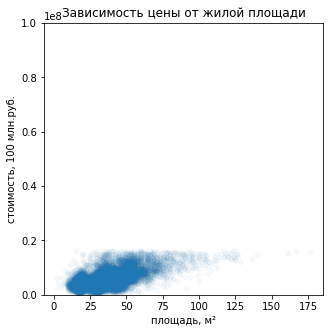

In [122]:
df.plot(x='living_area', y ='last_price', kind ='scatter', figsize=(5, 5), legend=True, alpha = 0.03)

plt.title('Зависимость цены от жилой площади')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

In [123]:
#df.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(10, 10))
#plt.title('Зависимость цены от площади кухни')
#plt.show()

In [124]:
df.plot(x='kitchen_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.03)

plt.title('Зависимость цены от площади кухни')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

In [125]:
 df.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(10, 10))
plt.title('Зависимость цены от числа комнат')
plt.show()

In [126]:
df.pivot_table(index='type_apartment_floor', values='last_price').plot(grid=True, style='o-', figsize=(10, 10))
plt.title('Зависимость цены от этажа')
plt.show()

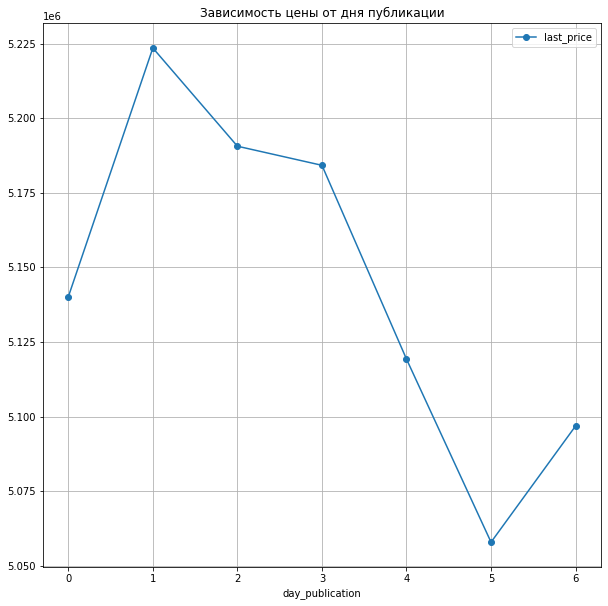

In [127]:
df.pivot_table(index='day_publication', values='last_price').plot(grid=True, style='o-', figsize=(10, 10))
plt.title('Зависимость цены от дня публикации')
plt.show()

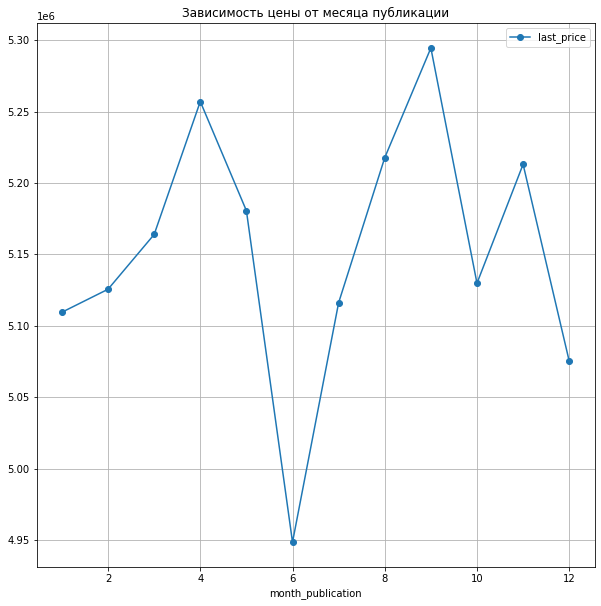

In [128]:
df.pivot_table(index='month_publication', values='last_price').plot(grid=True, style='o-', figsize=(10, 10))
plt.title('Зависимость цены от месяца публикации')
plt.show()

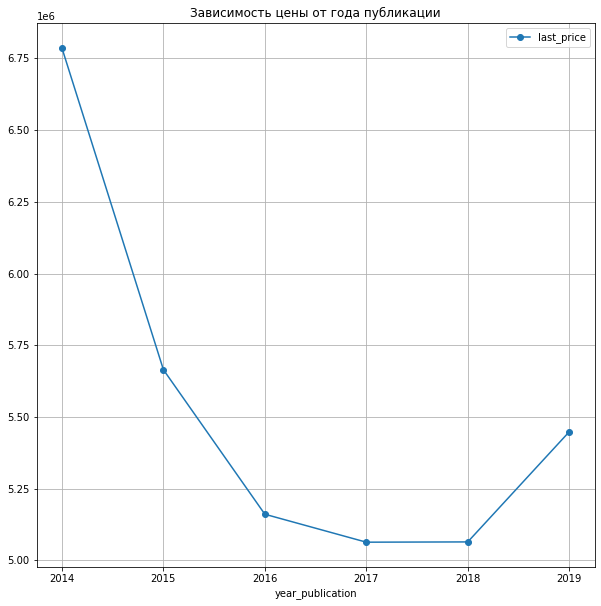

In [129]:
df.pivot_table(index='year_publication', values='last_price').plot(grid=True, style='o-', figsize=(10, 10))
plt.title('Зависимость цены от года публикации')
plt.show()

#### Промежуточный вывод:
- Чем больше общая площадь, тем выше стоимость. Корреляция этих параметров крайне высокая.
- Чем больше число комнат, тем больше цена (т.к. увеличивается жилая площадь), однако корреляция ниже, чем с общей площадью. Это может быть связано с тем, что существуют квартиры с большой площадью и малым колличеством комнат.
- Первый этаж является непердпочтительным. Квартиры на этом этаже значительно дешевле других. Последний этаж так же стоит ниже серединных.
- Между стоимостью квартиры и расстоянием до центра города есть слабая отрицательная связь. Чем меньше расстояние до центра, тем больше стоимость квартиры. 
- Между стоимостью квартиры и днем недели, месяцем или годом размещения объявления отсутствует линейная связь.

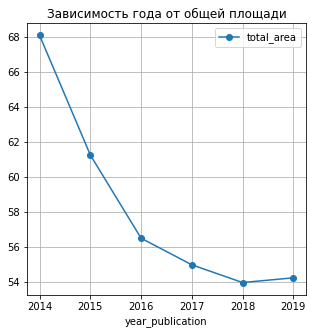

In [130]:
df.pivot_table(index='year_publication', values='total_area').plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимость года от общей площади')
plt.show()

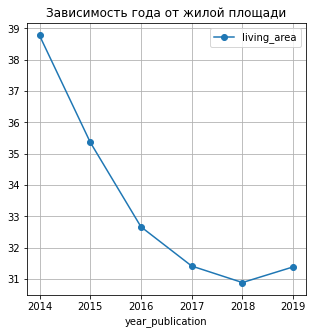

In [131]:
df.pivot_table(index='year_publication', values='living_area').plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимость года от жилой площади')
plt.show()

In [132]:
len(df[df['year_publication']==2015.0])

1041

In [133]:
len(df[df['year_publication']==2016.0])

2583

In [134]:
len(df[df['year_publication']==2017.0])

7654

In [135]:
len(df[df['year_publication']==2018.0])

8062

In [136]:
len(df[df['year_publication']==2019.0])

2685

In [137]:
#plt.hist(df['year_publication'], bins=20)
#plt.title('Зависимость количества объявлений от года публикации')
#plt.xlabel('Кол-во объявлений')
#plt.ylabel('Год публикации')
#plt.show()

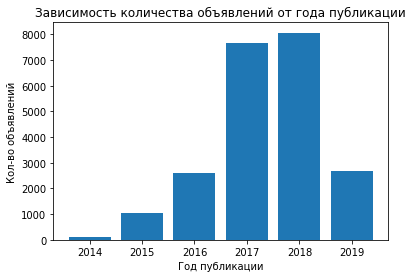

In [138]:
year_counts = df['year_publication'].value_counts().sort_index()
plt.bar(year_counts.index, year_counts.values)
plt.title('Зависимость количества объявлений от года публикации')
plt.xlabel('Год публикации')
plt.ylabel('Кол-во объявлений')
plt.show()

#### В дополнение к промежуточному выводу
<font color='red'> 
С течением лет в объявлениях наблюдается снижение площади квартир и жилой площади. В 2019 году жилая площадь стала больше, однако общая продолжила падать.

Количество объявлений росло до 2017 года, в 2018 году показатель немного упал, в 2019 году кол-во объявлений стало даже меньше, чем в 2016.
</font>  

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [139]:
top_10 = df.pivot_table(index='locality_name', values='last_price', aggfunc=['count'])
top_10.columns = ['count']
top_10 = top_10.sort_values(by='count', ascending=False).head(10)
top_10['price_square_meter'] = df.pivot_table(index='locality_name', values='price_square_meter').round(2)
top_10.sort_values(by='price_square_meter', ascending=False)

count  price_square_meter
locality_name                             
санкт-петербург  14282           107362.19
пушкин             343           101380.50
кудрово            468            95311.67
парголово          326            90103.14
мурино             585            86040.79
шушары             436            78605.58
колпино            337            75333.30
гатчина            305            68729.89
всеволожск         392            67166.34
выборг             226            57753.70

#### Промежуточный вывод:
Наибольшая стоимость за квадратный метр в Санкт-Петербурге (примерно 105 000). Следующий за ним Пушкин, удобный для проживания (почти 100 000). Далее идут районы на окраине Санкт-Петербурга. Наименьшая же стоимость в Гатчине и Всеволожске, которая может быть обусловлена значительным отдалением от центра Санкт-Петербурга примерная цена 67 000.

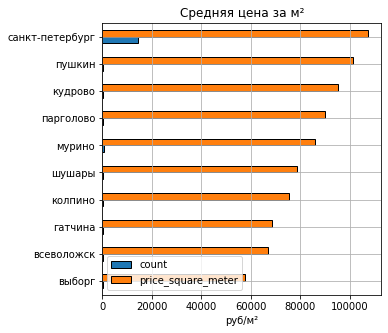

In [140]:
# Отобразим на графике среднюю цену квадратного метра в топ 10 населенных пунктах

top_10.sort_values(by='price_square_meter').plot(kind='barh', legend=True, grid=True, ec='black', figsize=(5, 5))

plt.title('Средняя цена за м²')
plt.xlabel('руб/м²')
plt.ylabel('')
plt.show()

#### Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим их среднюю стоимость на разном удалении от центра

In [141]:
df.query('locality_name == "санкт-петербург"')['distance_city_center'].describe()

count    14237.000000
mean        12.068975
std          4.601485
min          0.000000
25%          9.000000
50%         13.000000
75%         15.000000
max         29.000000
Name: distance_city_center, dtype: float64

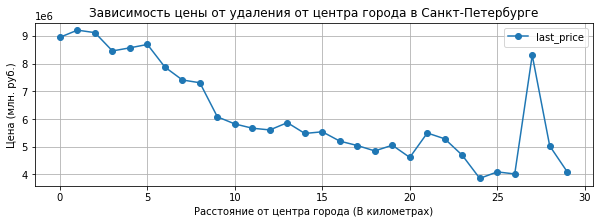

Средняя стоимость квартир в зависимости от удаления от центра города Санкт-Петербург


last_price
distance_city_center              
0.0                   8.948750e+06
1.0                   9.206893e+06
2.0                   9.115707e+06
3.0                   8.455166e+06
4.0                   8.567844e+06
5.0                   8.689990e+06
6.0                   7.872788e+06
7.0                   7.407321e+06
8.0                   7.306993e+06
9.0                   6.076527e+06
10.0                  5.819601e+06
11.0                  5.665898e+06
12.0                  5.603691e+06
13.0                  5.866572e+06
14.0                  5.476503e+06
15.0                  5.537113e+06
16.0                  5.199239e+06
17.0                  5.040459e+06
18.0                  4.846657e+06
19.0                  5.051410e+06
20.0                  4.611579e+06
21.0                  5.493469e+06
22.0                  5.282695e+06
23.0                  4.689843e+06
24.0                  3.854430e+06
25.0                  4.088954e+06
26.0                  4.014287e+06
27.0                  8.300000e+06
28.0                  5.026429e+06
29.0                  4.092500e+06

In [142]:
df.query('locality_name == "санкт-петербург"').pivot_table(index='distance_city_center',values='last_price') \
.plot(grid=True, style='o-', 
#       xlim=(0,15), 
# закомментировал твой код      
      figsize=(10, 3))
plt.title('Зависимость цены от удаления от центра города в Санкт-Петербурге')
plt.xlabel('Расстояние от центра города (В километрах)')
plt.ylabel('Цена (млн. руб.)')
plt.show()
print('Средняя стоимость квартир в зависимости от удаления от центра города Санкт-Петербург')
df.query('locality_name == "санкт-петербург" and distance_city_center<30') \
.pivot_table(values='last_price', index='distance_city_center')

#### Промежуточный вывод:
Самые дорогие квартиры находятся в центре города, по мере отдаления от него цена падает. Отдаление от города более, чем на 7 км уже не влияет на цену.

In [143]:
df.query('locality_name == "санкт-петербург" and distance_city_center<30') \
.pivot_table(values=('floor', 'rooms', 'living_area'), index='distance_city_center')

floor  living_area     rooms
distance_city_center                                  
0.0                    2.375000    45.400000  2.875000
1.0                    3.053571    48.816000  2.892857
2.0                    2.962766    50.528621  2.840426
3.0                    3.108614    49.351230  2.820225
4.0                    3.832370    45.446253  2.635838
5.0                    4.353731    42.794554  2.502985
6.0                    4.398693    37.358486  2.163399
7.0                    5.148734    35.911119  2.183544
8.0                    5.699219    35.582872  2.093750
9.0                    5.703237    32.884186  2.003597
10.0                   6.002933    30.668594  1.916422
11.0                   6.051556    30.723143  1.967111
12.0                   6.714831    30.400548  1.935710
13.0                   7.307423    31.339117  1.977591
14.0                   7.178430    30.342356  1.911182
15.0                   7.092520    30.480000  1.910761
16.0                   6.912450    29.745382  1.912450
17.0                   6.936842    30.266288  1.918129
18.0                   6.709302    28.985104  1.825581
19.0                   6.660256    28.656689  1.820513
20.0                   6.947368    32.886842  2.105263
21.0                   6.623932    32.477742  2.000000
22.0                   8.592965    32.036154  1.889447
23.0                   7.325301    29.434211  1.843373
24.0                  11.769231    22.284783  1.461538
25.0                   7.560000    24.376190  1.560000
26.0                   3.279070    22.000244  1.534884
27.0                   2.500000    23.250000  1.500000
28.0                   4.571429    33.428571  2.000000
29.0                   2.000000    28.625000  2.250000

In [144]:
km_3 = df.query('locality_name == "санкт-петербург" and distance_city_center== 3') \
.pivot_table(index='type_apartment_floor', values='distance_city_center', aggfunc=['count'])
km_3.columns = ['count']
km_3 = km_3.sort_values(by='count', ascending=False).head()
km_3

count
type_apartment_floor       
другой                  160
последний                62
первый                   45

In [145]:
km_5 = df.query('locality_name == "санкт-петербург" and distance_city_center== 5') \
.pivot_table(index='type_apartment_floor', values='distance_city_center', aggfunc=['count'])
km_5.columns = ['count']
km_5 = km_5.sort_values(by='count', ascending=False).head()
km_5

count
type_apartment_floor       
другой                  504
последний                96
первый                   70

#### Дополнение:
<font color='red'> 
Получается, что на 3 км от центра продаются примерно в одинаковом количестве квартиры (первого и последнего этажей) и других. На 5 км от центра ситуация меняется, и относительно общего числа кол-во квартир категории "другие" резко возрастает. Мы знаем, что эта категория стоит дороже, поэтому на 3 км появляется провал, на 5 - скачок.
</font>  

In [146]:
# check
(
    (
        df.query('locality_name == "санкт-петербург" and distance_city_center>= 3') \
            .pivot_table(index=['distance_city_center', 'type_apartment_floor'], values='balcony', aggfunc='count')
    )
    [0:9]
    .rename(columns={'balcony': 'count_flat'})
)

count_flat
distance_city_center type_apartment_floor            
3.0                  другой                       160
                     первый                        45
                     последний                     62
4.0                  другой                       368
                     первый                        70
                     последний                     81
5.0                  другой                       504
                     первый                        70
                     последний                     96

### Напишите общий вывод

В данном проекте были проанализированы объявления о продаже квартир в Санкт-Петербурге и его пригородах.В данных были обнаружены пропуски, которые были восполнены либо медианным значением, либо нулём, либо же не заполнены вовсе, из-за отсутствия некоторых параметров.

По результатам исследования выявлено, что наибольшее влияние на стоимость квартиры оказывает её площадь. Чем больше площадь квартиры, тем выше её стоимость. Также на стоимость квартиры влияет и количество комнат. Чем больше комнат, тем выше стоимость. На стоимость квартиры также влияет расстояние до центра города. Чем ближе квартира располагается к центру, тем выше ее стоимость. Зоной центра города можно называть окрестности 7 км.

Также установлено:
- Ожидаемое время продажи объекта недвижимости - от 45 до 232 дней.
- Самая высокая средняя стоимость квадратного метра в Санкт-Петербурге - 103 131 руб./м².
- Самая низкая средняя стоимость квадратного метра в Выборге - 66 672 руб./м² (из выборки топ 10 наиболее популярных населённых пунктов).

#### Новый вывод:
В данном проекте были проанализированы объявления о продаже квартир в Санкт-Петербурге и его пригородах.В данных были обнаружены пропуски, которые были восполнены либо медианным значением, либо нулём, либо же не заполнены вовсе, из-за отсутствия некоторых параметров.

По результатам исследования выявлено, что наибольшее влияние на стоимость квартиры оказывает её площадь. Чем больше площадь квартиры, тем выше её стоимость. Также на стоимость квартиры влияет и количество комнат. Чем больше комнат, тем выше стоимость. На стоимость квартиры также влияет расстояние до центра города. Чем ближе квартира располагается к центру, тем выше ее стоимость. Зоной центра города можно называть окрестности 7 км.


<font color='red'>  Изучено, как быстро продавались квартиры

Среднее значение продажи составляет 180 дня, при этом медианное значение составляет 95 дня, оно более точно характеризует среднее время продажи, так как не зависит от выбросов и нестандартных значений.
Чаще всего продажа квартиры занимает 45-60 дней.
Быстрыми продажами можно считать продажи состоявшиеся за 45 дней (в первом квартиле), а необычно долгие продажи после 232 дня и более (после 3 квартиля), которые могут совсем не продаваться.


Определены факторы, которые больше всего влияют на общую (полную) стоимость квартиры

Чем больше общая площадь, тем выше стоимость. Корреляция этих параметров крайне высокая.

Число комнат положительно на цену, однако зависимость ниже, чем у площади, так как бывают квартиры с большими по площади комнатами и квартиры в центре состоят из малого числа комнат, но стоят достаточно высоко.

Первый этаж так же влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных на средних этажах.


Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Наибольшая стоимость за квадратного метра в Санкт-Петербурге (примерно 107 000). Следующий за ним Пушкин, удобный для проживания (примерно 101 000). Далее идут районы на окраине Санкт-Петербурга. Наименьшая же стоимость в Гатчине,Всеволожске и Выборге, которая может быть обусловлена значительным отдалением от центра Санкт-Петербурга примерная цена  от 58 000 до 69 000.


Вычислена средняя стоимость квартиры на разном удалении от центра Санкт-Петербурга

Самые дорогие квартиры в центре города и их стоимость уменьшается c увеличением расстояния от центра города до 7 километров, далее стоимость не зависит от удаления.

С течением лет в объявлениях падала жилая площаль, росла цена (хоть в 2017 и 2018 года цена ниже 2015-2016, но в 2019 цена подскочила). Рост цен может быть связан с количеством объявлений. В 2019 году их как раз было очень мало, что могло отразиться на повышении цены. В 2017 и 2018 годах предлложений как раз много, что так же могло отразиться на финальной стоимости. 
    </font>  

In [147]:
# check
import seaborn as sns
import matplotlib.pyplot as plt

In [148]:
data = df.copy()

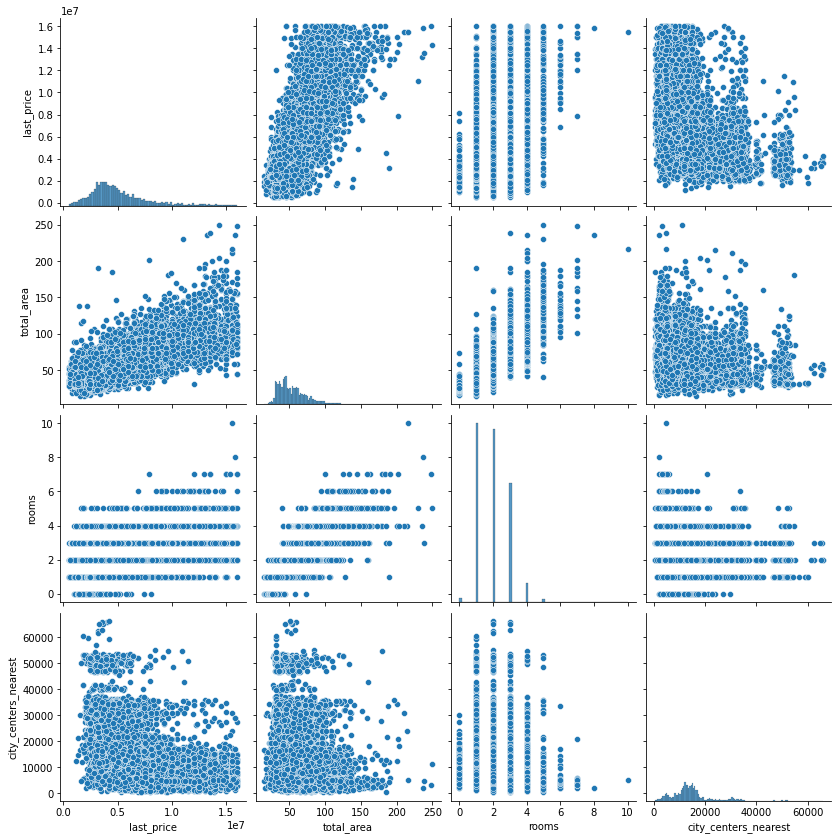

In [149]:
# check
sns.pairplot(df[['last_price', 'total_area', 'rooms', 'city_centers_nearest']])
plt.gcf().set_size_inches(12,12);


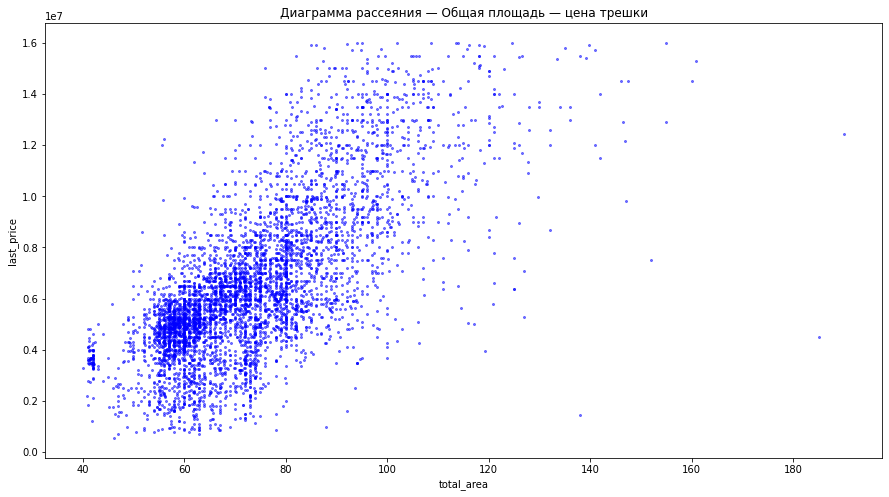

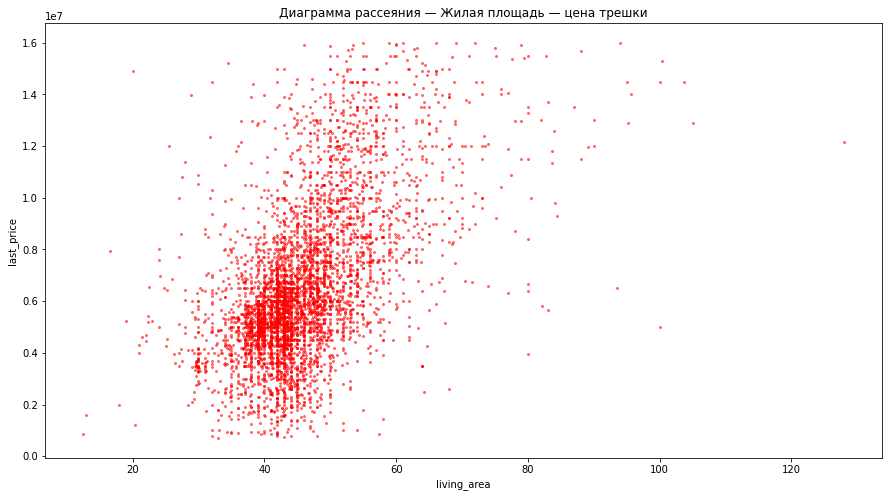

In [150]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

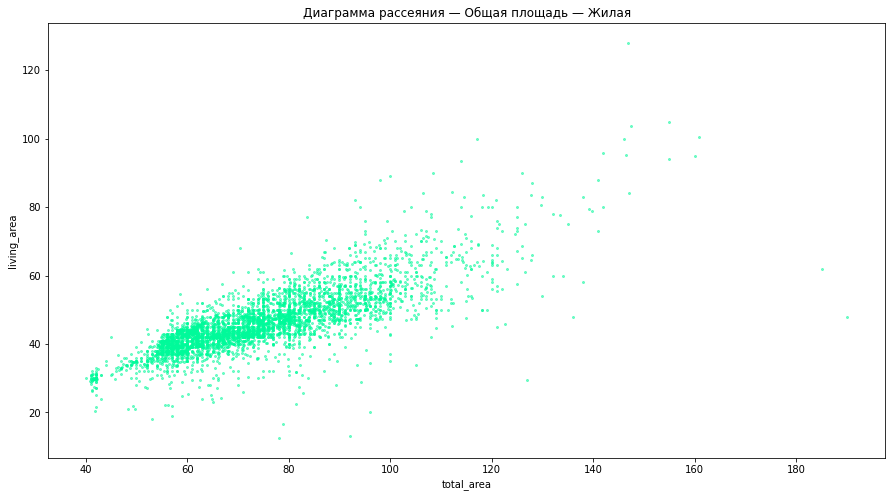

In [151]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'MediumSpringGreen', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');

In [152]:
# check TOP-10
# способы группировки и сортировки информации

(
    data
    .groupby('locality_name')['last_price']
    .agg({'count', 'mean'})
    .sort_values(by = 'count', ascending = False)
    .head(10)
    
).sort_values(by = 'mean', ascending = False).style.format("{:,.0f}")

# .plot(y = 'mean', kind = 'bar')
# стайл и плот вместе не работают